In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#тюнит параметры с помощью кросс-валидации
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [8]:
titanic_data = pd.read_csv("~/data/titanic/train.csv")

In [9]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [12]:
#метод дерева не умеет работать со строковым типом, поэтому преобразуем их
X = pd.get_dummies(X)
#метод дерева не умеет работать с NaN, поэтому заменим их на медиану в столбце age
X = X.fillna({'Age' : X.Age.median()})

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [2]:
clf_rf = RandomForestClassifier()

In [3]:
parameters = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}

In [14]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=5)

In [15]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [16]:
grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 30}

In [17]:
#задание
#rf = RandomForestClassifier(n_estimators=15, max_depth=5)
#rf.fit(x_train, y_train)
#predictions = rf.predict(x_test)

In [18]:
best_clf = grid_search_cv_clf.best_estimator_

In [20]:
best_clf.score(X_test, y_test)

0.8

In [22]:
feature_importances = best_clf.feature_importances_

In [24]:
feature_importances_df = pd.DataFrame({'feature': list(X_train), 'feature_importances': feature_importances})

In [26]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,feature,feature_importances
5,Sex_female,0.211450
6,Sex_male,0.190889
4,Fare,0.181989
1,Age,0.155457
0,Pclass,0.118462
2,SibSp,0.048300
3,Parch,0.038385
7,Embarked_C,0.023681
9,Embarked_S,0.023589
8,Embarked_Q,0.007798


In [27]:
heart_data = pd.read_csv("~/data/heart.csv")

In [28]:
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)

In [32]:
X = heart_data.drop('target', axis=1)
y = heart_data['target']

In [33]:
rf.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=10)

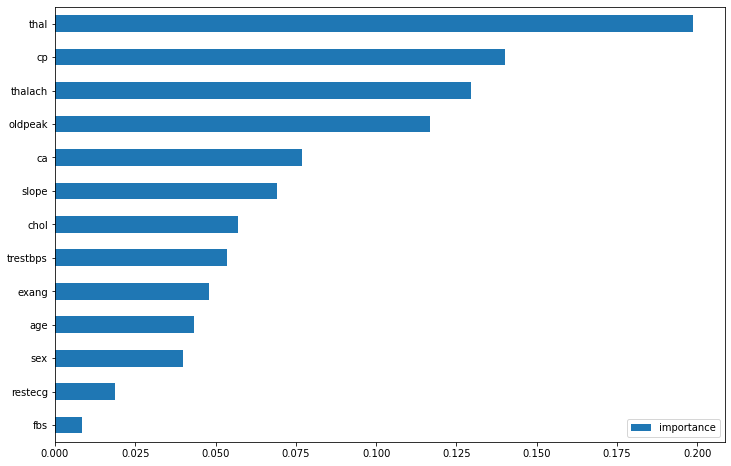

In [35]:
imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [ ]:
#задания по 3.5

In [3]:
data = pd.read_csv("~/data/training_mush.csv")

In [4]:
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [7]:
X = data.drop("class", axis=1)
y = data['class']

In [8]:
clf = RandomForestClassifier(random_state=0)

In [9]:
parameters = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [1, 3, 5, 7, 9, 11], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7], 'min_samples_split': [2, 4, 6, 8]}

In [10]:
grid_search = GridSearchCV(clf, parameters, cv=3)

In [11]:
grid_search.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [13]:
grid_search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [14]:
best = grid_search.best_estimator_

In [17]:
feature_importances = best.feature_importances_

In [19]:
feature_importances_df = pd.DataFrame({'feature': list(X), 'feature_importances': feature_importances})

In [22]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,feature,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [21]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,0,3,1,5,1,0,0,9,1,...,2,3,7,0,2,1,4,3,5,0
1,2,0,4,0,5,1,0,1,10,0,...,3,7,4,0,2,1,0,7,4,0
2,2,0,3,0,2,1,0,0,7,0,...,1,0,4,0,2,1,2,1,5,1
3,0,0,3,0,5,1,1,0,2,0,...,2,7,7,0,2,2,4,7,3,1
4,2,3,3,1,5,1,0,0,10,1,...,2,3,6,0,2,1,4,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,3,1
6089,3,2,2,0,2,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,0
6090,5,2,3,0,1,1,0,1,9,0,...,2,7,7,0,2,1,4,3,4,0
6091,3,2,3,0,5,1,1,0,2,0,...,2,7,7,0,2,2,4,7,3,1


In [25]:
testing_mush = pd.read_csv("~/data/testing_mush.csv")

In [31]:
testing_mush

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,3,3,2,0,2,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2
2027,5,2,8,1,0,1,0,0,10,0,...,2,7,7,0,2,1,4,2,2,1
2028,5,3,3,0,2,1,0,0,3,0,...,1,6,0,0,2,1,2,1,4,4
2029,5,3,3,1,5,1,0,0,9,1,...,2,3,3,0,2,1,4,3,4,0


In [33]:
predict = best.predict(testing_mush)

In [42]:
predict[predict == 1].sum()

976

In [46]:
len(predict)

2031

In [47]:
data1 = pd.read_csv("~/data/testing_y_mush.csv")

In [53]:
from sklearn.metrics import confusion_matrix

In [56]:
confusion_matrix(data1, predict)new_data

array([[1055,    0],
       [   0,  976]])

In [57]:
new_data = pd.read_csv("~/data/invasion.csv")

In [59]:
X = new_data.drop("class", axis=1)
y = new_data["class"]

In [60]:
clf = RandomForestClassifier(random_state=0)

In [62]:
new_grid_search = GridSearchCV(clf, parameters, cv=5)

In [63]:
new_grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [64]:
train_data = pd.read_csv("~/data/operative_information.csv")

In [66]:
new_best = new_grid_search.best_estimator_

In [67]:
new_predict = new_best.predict(train_data)

In [84]:
len(new_predict[new_predict == "cruiser"])

230

In [83]:
new_predict[new_predict != 1]

array(['transport', 'transport', 'transport', 'transport', 'cruiser',
       'transport', 'cruiser', 'transport', 'transport', 'transport',
       'transport', 'cruiser', 'transport', 'transport', 'transport',
       'cruiser', 'transport', 'transport', 'transport', 'cruiser',
       'transport', 'transport', 'cruiser', 'transport', 'cruiser',
       'transport', 'transport', 'cruiser', 'cruiser', 'cruiser',
       'transport', 'transport', 'transport', 'cruiser', 'transport',
       'transport', 'cruiser', 'transport', 'cruiser', 'transport',
       'transport', 'cruiser', 'transport', 'cruiser', 'transport',
       'transport', 'transport', 'transport', 'transport', 'transport',
       'transport', 'transport', 'transport', 'transport', 'transport',
       'cruiser', 'cruiser', 'transport', 'transport', 'transport',
       'cruiser', 'transport', 'transport', 'cruiser', 'transport',
       'transport', 'transport', 'transport', 'cruiser', 'transport',
       'cruiser', 'transport', '

In [82]:
new_data

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...,...
495,fighter,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,transport,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,fighter,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,fighter,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [85]:
new_feature_importances = new_best.feature_importances_

In [86]:
new_feature_importances_df = pd.DataFrame({'feature': list(X), 'feature_importances': new_feature_importances})

In [87]:
new_feature_importances_df

,feature,feature_importances
0,g_reflection,0.082723
1,i_reflection,0.124372
2,speed,0.171441
3,brightness,0.363803
4,time_of_observance,0.000000
5,volume,0.257661


In [88]:
dang_data = pd.read_csv("~/data/space_can_be_a_dangerous_place.csv")

In [95]:
X = dang_data.drop("dangerous", axis=1)
y = dang_data["dangerous"]

In [96]:
dang_grid_search = GridSearchCV(clf, parameters, cv=5)

In [97]:
dang_grid_search.fit(X, y)

KeyboardInterrupt: 

In [100]:
parameters = {'n_estimators': [10], 'max_depth': [5]}

In [101]:
dang_grid_search = GridSearchCV(clf, parameters, cv=3)

In [102]:
dang_grid_search.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5], 'n_estimators': [10]})

In [105]:
dang_dang = dang_grid_search.best_estimator_.feature_importances_

In [107]:
dang_feature_importances_df = pd.DataFrame({'feature': list(X), 'feature_importances': dang_dang})

In [137]:
dang_feature_importances_df["feature_importances"].sum()

1.0

In [116]:
dang_feature_importances_df["feature_importances"].apply(lambda x: x+1)

0    1.003377
1    1.002359
2    1.003160
3    1.003832
4    1.010990
5    1.560338
6    1.415944
Name: feature_importances, dtype: float64

In [124]:
%%timeit
dang_data.describe().loc['mean']

53.7 ms ± 2.81 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [123]:
%%timeit
dang_data.apply('mean')

11.6 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [126]:
%%timeit
dang_data.apply(np.mean)

6.76 ms ± 203 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [128]:
%%timeit
dang_data.mean(axis=0)

11.2 ms ± 114 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [129]:
iris = pd.read_csv("~/data/iris.csv")

In [130]:
%%timeit
iris.describe().loc['mean']

16.9 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [131]:
%%timeit
iris.apply('mean')

405 µs ± 33.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [132]:
%%timeit
iris.apply(np.mean)

1.57 ms ± 100 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [133]:
%%timeit
iris.mean(axis=0)

353 µs ± 60.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [135]:
wintering

NameError: name 'wintering' is not defined

In [142]:
pd.Series(["2020-10-12"]).index.year

AttributeError: 'RangeIndex' object has no attribute 'year'